# Rational Speech Act

In [1]:
from flippy import infer, condition, flip, draw_from
from math import exp, log as log_
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def log(x):
    return log_(x) if x > 0 else float('-inf')

In [33]:
# !pip install pandas
# !pip install seaborn

In [ ]:
def world_prior():
    return draw_from(4)

def utterance_prior():
    return draw_from(['some', "all", 'none'])

def meaning(utt, world):
    return (
        world > 0 if utt == 'some' else
        world == 3 if utt == 'all' else
        world == 0 if utt == 'none' else
        True
    )

@infer
def literal_listener(utterance):
    world = world_prior()
    m = meaning(utterance, world)
    condition(m)
    return world

@infer
def speaker(world, rationality=1) -> str:
    utterance = utterance_prior()
    listener_beliefs = literal_listener(utterance)
    true_belief = listener_beliefs.prob(world)
    condition(exp(rationality*log(true_belief)))
    return utterance

@infer
def pragmatic_listener(utterance, speaker_rationality=1):
    world = world_prior()
    speaker_policy = speaker(world, rationality=speaker_rationality)
    speaker_policy.observe(utterance)
    return world

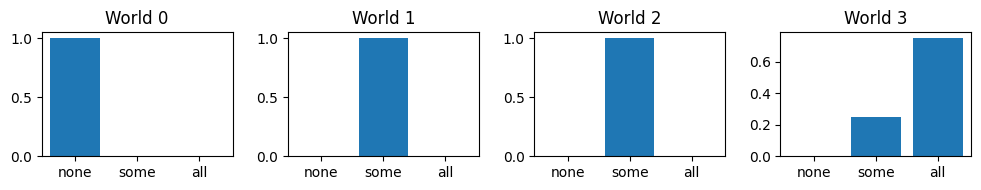

In [42]:
speaker_policy_df = []
fig, axes = plt.subplots(1, 4, figsize=(10, 2))
for ax, w in zip(axes, range(4)):
    speaker_policy = speaker(w, rationality=1)
    ax.bar(['none', 'some', 'all'], 
           [speaker_policy.prob('none'), speaker_policy.prob('some'), speaker_policy.prob('all')])
    ax.set_title(f'World {w}')
fig.tight_layout()

In [43]:
pragmatic_listener("some", speaker_rationality=2)

,Element,Probability
0,2,0.476
1,1,0.476
2,3,0.048
